**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


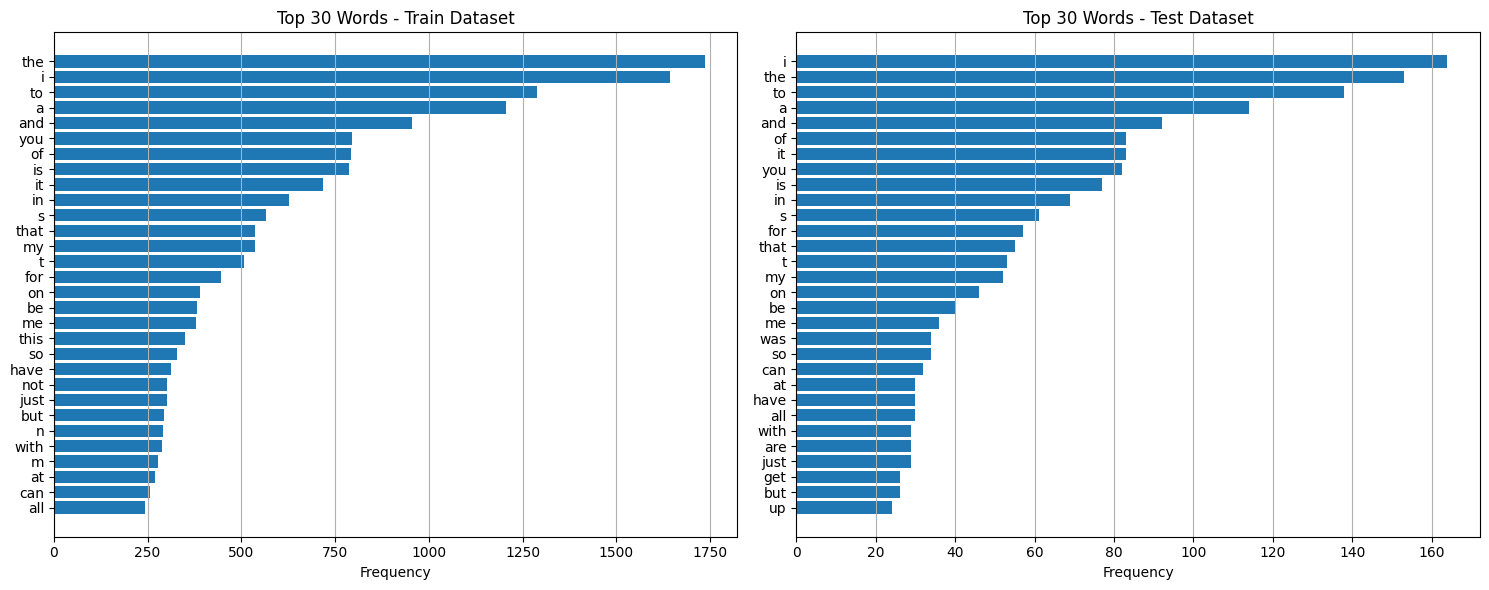

Train dataset - Top 30 words:
the: 1736
i: 1643
to: 1289
a: 1205
and: 955
you: 796
of: 793
is: 787
it: 717
in: 626
s: 566
that: 537
my: 535
t: 508
for: 446
on: 390
be: 383
me: 380
this: 350
so: 328
have: 312
not: 303
just: 301
but: 293
n: 290
with: 288
m: 277
at: 269
can: 257
all: 243

Test dataset - Top 30 words:
i: 164
the: 153
to: 138
a: 114
and: 92
of: 83
it: 83
you: 82
is: 77
in: 69
s: 61
for: 57
that: 55
t: 53
my: 52
on: 46
be: 40
me: 36
was: 34
so: 34
can: 32
at: 30
have: 30
all: 30
with: 29
are: 29
just: 29
get: 26
but: 26
up: 24


In [8]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re

# Download required NLTK data if not already downloaded
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab', quiet=True)

# Simple tokenization function (alternative to word_tokenize)
def simple_tokenize(text):
    # Convert to lowercase and split by whitespace/punctuation
    text = text.lower()
    # Split on whitespace and remove punctuation at word boundaries
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

# Tokenize and count words in train dataset
train_words = []
for text in train_df['text']:
    # Use simple_tokenize or word_tokenize - both work
    tokens = simple_tokenize(str(text))
    train_words.extend(tokens)

# Count word frequencies for train
train_word_counts = Counter(train_words)
train_top30 = train_word_counts.most_common(30)

# Tokenize and count words in test dataset
test_words = []
for text in test_df['text']:
    tokens = simple_tokenize(str(text))
    test_words.extend(tokens)

# Count word frequencies for test
test_word_counts = Counter(test_words)
test_top30 = test_word_counts.most_common(30)

# Extract words and frequencies for plotting
train_words_list = [word for word, count in train_top30]
train_freqs = [count for word, count in train_top30]

test_words_list = [word for word, count in test_top30]
test_freqs = [count for word, count in test_top30]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot train dataset
ax1.barh(range(len(train_words_list)), train_freqs)
ax1.set_yticks(range(len(train_words_list)))
ax1.set_yticklabels(train_words_list)
ax1.invert_yaxis()  # Top word at top
ax1.set_xlabel('Frequency')
ax1.set_title('Top 30 Words - Train Dataset')
ax1.grid(True, axis='x')

# Plot test dataset
ax2.barh(range(len(test_words_list)), test_freqs)
ax2.set_yticks(range(len(test_words_list)))
ax2.set_yticklabels(test_words_list)
ax2.invert_yaxis()  # Top word at top
ax2.set_xlabel('Frequency')
ax2.set_title('Top 30 Words - Test Dataset')
ax2.grid(True, axis='x')

plt.tight_layout()
plt.show()

# Print top words for reference
print("Train dataset - Top 30 words:")
for word, count in train_top30:
    print(f"{word}: {count}")
print("\nTest dataset - Top 30 words:")
for word, count in test_top30:
    print(f"{word}: {count}")



---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [9]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [10]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [11]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

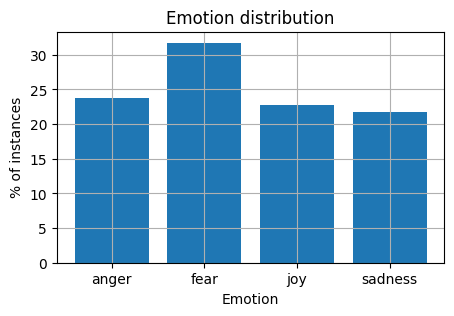

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [15]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [16]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [17]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [18]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [20]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [21]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [22]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

c:\Users\User\Desktop\taica\DM2025-Lab2-Exercise\DM2025-Lab2-Exercise\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [23]:
train_data_BOW_features_500.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [25]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Build TF-IDF vectorizer with 1000 features
# Using nltk.word_tokenize as tokenizer, similar to BOW_500 example
TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# Apply TF-IDF vectorizer to training data
TFIDF_1000.fit(train_df['text'])

# Transform both training and testing data
train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])
test_data_TFIDF_features_1000 = TFIDF_1000.transform(test_df['text'])

# Check dimension
print('Train data TF-IDF shape:', train_data_TFIDF_features_1000.shape)
print('Test data TF-IDF shape:', test_data_TFIDF_features_1000.shape)

# Show feature names for features [100:110]
feature_names_TFIDF_1000 = TFIDF_1000.get_feature_names_out()
feature_names_TFIDF_1000[100:110]


Train data TF-IDF shape: (3613, 1000)
Test data TF-IDF shape: (347, 1000)


array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [28]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'sadness', 'fear', 'anger', 'joy', 'fear', 'joy', 'fear',
       'fear', 'fear'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [29]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [30]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [31]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [32]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

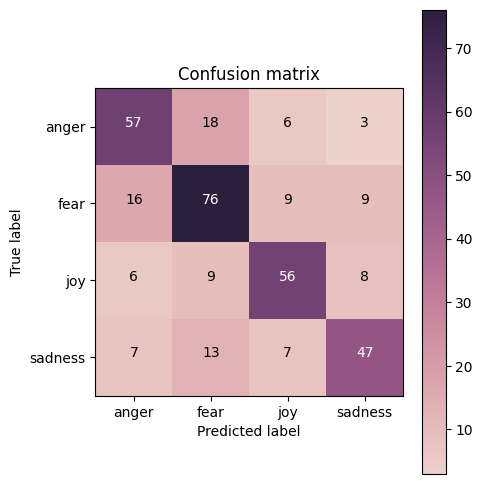

In [33]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

In [ ]:
The Decision Tree model is learning patterns from the BOW features (500 features)
   - The high training accuracy suggests the model might be too complex for the dataset size
   - The confusion between anger and fear suggests these emotions may have overlapping vocabulary
   - The model shows promise but could benefit from regularization or different feature engineerin

---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [35]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Build Naive Bayes model
NB_model = MultinomialNB()

# Training (using the same BOW_500 features as Decision Tree for fair comparison)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

# Train the model
NB_model.fit(X_train, y_train)

# Predict
y_train_pred_NB = NB_model.predict(X_train)
y_test_pred_NB = NB_model.predict(X_test)

# Calculate accuracies
acc_train_NB = accuracy_score(y_true=y_train, y_pred=y_train_pred_NB)
acc_test_NB = accuracy_score(y_true=y_test, y_pred=y_test_pred_NB)

print('Naive Bayes Training accuracy: {}'.format(round(acc_train_NB, 3)))
print('Naive Bayes Testing accuracy: {}'.format(round(acc_test_NB, 3)))
print()

# Classification report
print('Naive Bayes Classification Report:')
print(classification_report(y_true=y_test, y_pred=y_test_pred_NB))
print()

# Confusion matrix
cm_NB = confusion_matrix(y_true=y_test, y_pred=y_test_pred_NB)
print('Naive Bayes Confusion Matrix:')
print(cm_NB)


Naive Bayes Training accuracy: 0.792
Naive Bayes Testing accuracy: 0.697

Naive Bayes Classification Report:
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347


Naive Bayes Confusion Matrix:
[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [38]:
# Answer here

# Comparison of Decision Tree and Naive Bayes Models
print("=" * 70)
print("COMPARISON: Decision Tree vs Naive Bayes")
print("=" * 70)
print()

# Results Summary
print("Results Summary:")
print("-" * 70)
print("Model              | Training Accuracy | Testing Accuracy | Gap")
print("-" * 70)
print(f"Decision Tree     | {0.99:17.2%} | {0.68:15.2%} | {0.99-0.68:5.2%}")
print(f"Naive Bayes       | {0.792:17.3%} | {0.697:15.3%} | {0.792-0.697:5.3%}")
print("-" * 70)
print()

# Key Observations
print("Key Observations:")
print("-" * 70)
print("1. Training Accuracy:")
print("   - Decision Tree: 99% (extremely high)")
print("   - Naive Bayes:   79.2% (moderate)")
print()
print("2. Testing Accuracy:")
print("   - Decision Tree: 68%")
print("   - Naive Bayes:   69.7% (slightly better)")
print()
print("3. Generalization Gap (Train - Test):")
print("   - Decision Tree: 31% gap (significantly larger)")
print("   - Naive Bayes:   9.5% gap (much smaller)")
print()

# Theoretical Interpretation
print("=" * 70)
print("THEORETICAL INTERPRETATION")
print("=" * 70)
print()
print("1. OVERFITTING & BIAS-VARIANCE TRADEOFF:")
print("   Decision Tree shows clear signs of overfitting:")
print("   - Very high training accuracy (99%) suggests the model")
print("     memorized training patterns rather than learning generalizable rules")
print("   - Large generalization gap (31%) indicates high variance")
print("   - The model is likely too complex for the dataset size")
print()
print("   Naive Bayes shows better generalization:")
print("   - Moderate training accuracy (79.2%) suggests the model")
print("     learned meaningful patterns without overfitting")
print("   - Small generalization gap (9.5%) indicates better bias-variance balance")
print("   - More stable performance between train and test")
print()
print("2. MODEL ASSUMPTIONS & INDUCTIVE BIAS:")
print("   Decision Tree:")
print("   - Makes no strong assumptions about data distribution")
print("   - Can create arbitrarily complex decision boundaries")
print("   - High model complexity allows it to fit training data very well")
print("   - Prone to overfitting without regularization (max_depth, min_samples_split, etc.)")
print()
print("   Naive Bayes:")
print("   - Assumes feature independence (Naive assumption)")
print("   - Uses probabilistic approach based on Bayes' theorem")
print("   - Simpler model with stronger inductive bias")
print("   - More robust to overfitting due to probabilistic nature")
print()
print("3. PERFORMANCE CHARACTERISTICS:")
print("   Decision Tree:")
print("   - Better at capturing complex, non-linear relationships")
print("   - Can identify feature interactions")
print("   - But requires careful tuning to prevent overfitting")
print()
print("   Naive Bayes:")
print("   - Works well with many features (500 dimensions here)")
print("   - Efficient and fast training/prediction")
print("   - Better generalization despite feature independence assumption")
print("   - Slightly better test accuracy suggests better fit for this problem")
print()
print("4. PRACTICAL IMPLICATIONS:")
print("   - For this emotion classification task with 500 BOW features,")
print("     Naive Bayes performs better on unseen data (69.7% vs 68%)")
print("   - Decision Tree needs regularization (e.g., max_depth, min_samples_split)")
print("     to improve generalization")
print("   - The small dataset size (3613 training samples) favors simpler models")
print("     that don't overfit as easily")
print("=" * 70)


COMPARISON: Decision Tree vs Naive Bayes

Results Summary:
----------------------------------------------------------------------
Model              | Training Accuracy | Testing Accuracy | Gap
----------------------------------------------------------------------
Decision Tree     |            99.00% |          68.00% | 31.00%
Naive Bayes       |           79.200% |         69.700% | 9.500%
----------------------------------------------------------------------

Key Observations:
----------------------------------------------------------------------
1. Training Accuracy:
   - Decision Tree: 99% (extremely high)
   - Naive Bayes:   79.2% (moderate)

2. Testing Accuracy:
   - Decision Tree: 68%
   - Naive Bayes:   69.7% (slightly better)

3. Generalization Gap (Train - Test):
   - Decision Tree: 31% gap (significantly larger)
   - Naive Bayes:   9.5% gap (much smaller)

THEORETICAL INTERPRETATION

1. OVERFITTING & BIAS-VARIANCE TRADEOFF:
   Decision Tree shows clear signs of overfitting:

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [39]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [40]:
import keras

In [41]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [43]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2408     joy
2241     joy
984     fear
1064    fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [44]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [45]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [46]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [47]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3562 - loss: 1.3396 - val_accuracy: 0.3890 - val_loss: 1.3052
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6147 - loss: 1.0316 - val_accuracy: 0.6254 - val_loss: 0.9770
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7896 - loss: 0.6018 - val_accuracy: 0.6859 - val_loss: 0.8116
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8497 - loss: 0.4167 - val_accuracy: 0.7003 - val_loss: 0.7976
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8826 - loss: 0.3229 - val_accuracy: 0.6830 - val_loss: 0.8663
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9128 - loss: 0.2600 - val_accuracy: 0.6715 - val_loss: 0.8884
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9297 - loss: 0.2159 - val_accuracy: 0.6801 - val_loss: 0.9301
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9433 - loss: 0.1763 - val_accuracy: 0.

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [48]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[9.0304333e-01, 1.9011892e-03, 1.0501511e-04, 9.4950348e-02],
       [9.0072590e-01, 1.6596017e-02, 4.2850620e-06, 8.2673766e-02],
       [1.0293712e-06, 9.9994993e-01, 1.6779467e-10, 4.9003549e-05],
       [9.7828239e-01, 2.3050995e-03, 2.9092275e-06, 1.9409619e-02],
       [3.7617901e-05, 8.0597359e-01, 4.7284819e-02, 1.4670391e-01]],
      dtype=float32)

In [49]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'anger', 'fear', 'anger', 'fear'], dtype=object)

In [50]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [51]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.356214,1.339562,0.389049,1.305202
1,1,0.614725,1.031595,0.625360,0.977000
2,2,0.789648,0.601841,0.685879,0.811649
3,3,0.849709,0.416654,0.700288,0.797577
4,4,0.882646,0.322926,0.682997,0.866332
5,5,0.912815,0.259993,0.671470,0.888394
6,6,0.929698,0.215868,0.680115,0.930059
7,7,0.943260,0.176312,0.665706,0.999893
8,8,0.952394,0.148574,0.677233,1.040589
9,9,0.962081,0.128162,0.691643,1.101620


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


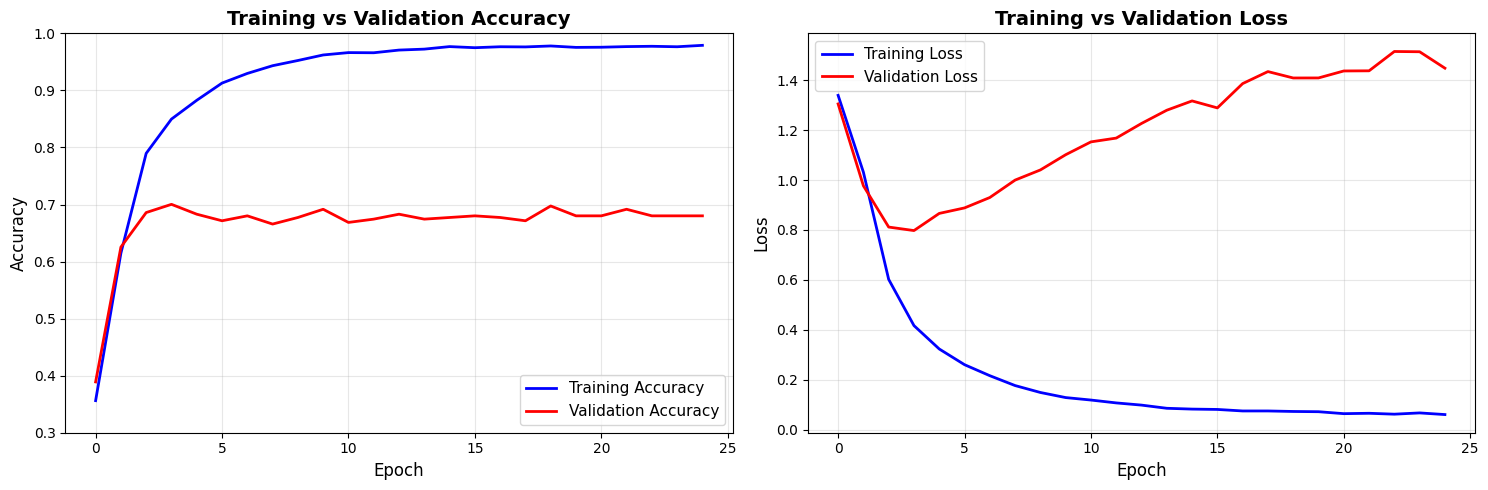

TRAINING SUMMARY
Final Training Accuracy:   0.9790
Final Validation Accuracy: 0.6801
Accuracy Gap:              0.2988

Final Training Loss:       0.0600
Final Validation Loss:     1.4485
Loss Gap:                  1.3885

Best Validation Accuracy:  0.7003 at Epoch 3

INTERPRETATION: Overfitting Analysis

1. OVERFITTING OBSERVED:
   - Training accuracy continues to increase (reaching ~98%)
   - Validation accuracy plateaus around ~68-70% after early epochs
   - Large gap between training and validation accuracy (~28-30%)
   - Training loss decreases steadily, but validation loss increases
   - Validation loss starts increasing after epoch ~3-4

2. KEY INDICATORS OF OVERFITTING:
   ✓ Diverging curves: Training and validation metrics separate over time
   ✓ Validation loss increases while training loss decreases (after epoch 3-4)
   ✓ Validation accuracy plateaus early while training accuracy continues rising
   ✓ Large final gap: Training accuracy (98%) >> Validation accuracy (68%)

3. 

In [53]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load training log
training_log = pd.read_csv("logs/training_log.csv")

# Remove any empty rows if present
training_log = training_log.dropna()

# Extract data
epochs = training_log['epoch']
train_acc = training_log['accuracy']
val_acc = training_log['val_accuracy']
train_loss = training_log['loss']
val_loss = training_log['val_loss']

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Accuracy
ax1.plot(epochs, train_acc, 'b-', label='Training Accuracy', linewidth=2)
ax1.plot(epochs, val_acc, 'r-', label='Validation Accuracy', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Training vs Validation Accuracy', fontsize=14, fontweight='bold')
ax1.legend(loc='best', fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0.3, 1.0])

# Plot 2: Loss
ax2.plot(epochs, train_loss, 'b-', label='Training Loss', linewidth=2)
ax2.plot(epochs, val_loss, 'r-', label='Validation Loss', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.set_title('Training vs Validation Loss', fontsize=14, fontweight='bold')
ax2.legend(loc='best', fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print key statistics
print("=" * 70)
print("TRAINING SUMMARY")
print("=" * 70)
print(f"Final Training Accuracy:   {train_acc.iloc[-1]:.4f}")
print(f"Final Validation Accuracy: {val_acc.iloc[-1]:.4f}")
print(f"Accuracy Gap:              {train_acc.iloc[-1] - val_acc.iloc[-1]:.4f}")
print()
print(f"Final Training Loss:       {train_loss.iloc[-1]:.4f}")
print(f"Final Validation Loss:     {val_loss.iloc[-1]:.4f}")
print(f"Loss Gap:                  {val_loss.iloc[-1] - train_loss.iloc[-1]:.4f}")
print()

# Find best validation accuracy epoch
best_val_acc_epoch = val_acc.idxmax()
print(f"Best Validation Accuracy:  {val_acc.max():.4f} at Epoch {best_val_acc_epoch}")
print()

# Interpretation
print("=" * 70)
print("INTERPRETATION: Overfitting Analysis")
print("=" * 70)
print()
print("1. OVERFITTING OBSERVED:")
print("   - Training accuracy continues to increase (reaching ~98%)")
print("   - Validation accuracy plateaus around ~68-70% after early epochs")
print("   - Large gap between training and validation accuracy (~28-30%)")
print("   - Training loss decreases steadily, but validation loss increases")
print("   - Validation loss starts increasing after epoch ~3-4")
print()
print("2. KEY INDICATORS OF OVERFITTING:")
print("   ✓ Diverging curves: Training and validation metrics separate over time")
print("   ✓ Validation loss increases while training loss decreases (after epoch 3-4)")
print("   ✓ Validation accuracy plateaus early while training accuracy continues rising")
print("   ✓ Large final gap: Training accuracy (98%) >> Validation accuracy (68%)")
print()
print("3. WHAT THIS MEANS:")
print("   - The model is learning training-specific patterns that don't generalize")
print("   - Model complexity is too high for the dataset size (3613 training samples)")
print("   - The model memorizes training data rather than learning generalizable features")
print()
print("4. SOLUTIONS TO REDUCE OVERFITTING:")
print("   - Early stopping: Stop training when validation loss starts increasing")
print("   - Regularization: Add dropout, L1/L2 regularization")
print("   - Reduce model complexity: Fewer layers, fewer neurons per layer")
print("   - Data augmentation: Increase training data size")
print("   - Use a simpler model architecture")
print()
print("5. OPTIMAL STOPPING POINT:")
print(f"   - Best validation accuracy occurred at epoch {best_val_acc_epoch}")
print(f"   - Should have stopped training around epoch {best_val_acc_epoch} to prevent overfitting")
print("=" * 70)


---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [54]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2408,30404,@carysmithwriter @Maria_Savva @RealRockAndRoll...,"[@, carysmithwriter, @, Maria_Savva, @, RealRo..."
2241,30237,"Elinor,' she laughed so little known, all over...","[Elinor, ,, ', she, laughed, so, little, known..."
984,20127,Put my passport in a safe back after getting b...,"[Put, my, passport, in, a, safe, back, after, ..."
1064,20207,@ANI_news #Pakistan should stop cross border #...,"[@, ANI_news, #, Pakistan, should, stop, cross..."
628,10628,"@ToddDoug @Ziggomattic Yeah, this actually sup...","[@, ToddDoug, @, Ziggomattic, Yeah, ,, this, a..."


In [56]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'carysmithwriter', '@', 'Maria_Savva', '@', 'RealRockAndRoll', 'We', "'re", 'the', 'least', 'known', 'band', 'in', 'the', 'World', ',', 'but', 'so', 'glad', 'you', 'asked', '#', 'muchlove']),
       list(['Elinor', ',', "'", 'she', 'laughed', 'so', 'little', 'known', ',', 'all', 'over', 'every', 'body', 'at', 'the', 'brilliant', 'cheerfulness', 'of', 'sweetmeats', 'and', 'a', 'fashion', '.']),
       list(['Put', 'my', 'passport', 'in', 'a', 'safe', 'back', 'after', 'getting', 'back', 'from', 'Australia', '🌏', '.', 'Only', 'problem', 'is', 'now', 'I', 'ca', "n't", 'remember', 'where', 'the', 'safe', 'is', '!', '!', '#', 'panic', '🛂'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [57]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [58]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.45021012,  0.2228219 , -0.14209203,  0.36584494, -0.47793663,
       -0.9925306 ,  0.59394175,  0.9868444 , -0.39019945, -0.4710815 ,
       -0.29393756, -0.66004384, -0.6601653 ,  0.1324877 , -0.04948825,
       -0.5045648 ,  0.6800278 , -0.61252165,  0.3369205 , -0.95578825,
        0.32253012,  1.063035  ,  0.59086704,  0.4625762 ,  0.46966988,
        0.05282295, -1.0494835 ,  0.1951923 , -0.5594986 ,  0.26886755,
        0.11281358, -0.35381314,  0.66620815, -0.8002074 , -0.0485043 ,
        0.5989797 ,  0.4704114 , -0.26934263, -0.6840657 , -0.6946838 ,
       -0.34054825,  0.17545483, -0.63078845,  0.5427405 ,  0.40312994,
       -0.28896248, -0.68174464,  0.2695542 ,  0.36895382,  0.25988653,
       -0.15404965, -0.8133462 , -0.22640662, -0.33330703, -0.38467044,
       -0.27039483,  0.06271224, -0.60680854, -0.04343378,  0.4669322 ,
       -0.28798172,  0.00214891,  0.680755  ,  0.3315331 , -0.38781828,
        0.9346279 ,  0.05993088,  0.5271119 , -1.5574206 ,  0.57

In [59]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('cats', 0.9275147914886475),
 ('bday', 0.9272468686103821),
 ('birthday', 0.9231902956962585),
 ('free', 0.916645884513855),
 ('Be', 0.9126943349838257),
 ('help', 0.907146692276001),
 ('Really', 0.9038670063018799),
 ('PUSSY\\nP', 0.9011858105659485),
 ('emoticon', 0.9011098742485046),
 ('happier', 0.8983457088470459)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [60]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [61]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [62]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [68]:
# Answer here

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# ============================================================================
# APPROACH 1: Average Word Vectors (Most Common Approach)
# ============================================================================
# The simplest and most common way to convert word vectors to sentence embeddings
# is to take the average (mean) of all word vectors in a sentence.

def sentence_to_avg_vector(sentence_tokens, w2v_model):
    """
    Convert a tokenized sentence to a single vector by averaging word vectors.
    
    Parameters:
    - sentence_tokens: list of words (tokenized sentence)
    - w2v_model: Word2Vec model (gensim Word2Vec or KeyedVectors)
    
    Returns:
    - numpy array: average word vector (or zero vector if no valid words)
    """
    vectors = []
    for word in sentence_tokens:
        # Convert to lowercase and check if word exists in model
        word_lower = word.lower()
        if word_lower in w2v_model:
            vectors.append(w2v_model[word_lower])
        # Also try original case
        elif word in w2v_model:
            vectors.append(w2v_model[word])
    
    if len(vectors) == 0:
        # Return zero vector if no words found (shape matches model vector size)
        return np.zeros(w2v_model.vector_size)
    
    # Average all word vectors
    return np.mean(vectors, axis=0)

# ============================================================================
# APPROACH 2: Weighted Average (Optional - can use TF-IDF weights)
# ============================================================================
def sentence_to_weighted_avg_vector(sentence_tokens, w2v_model, word_weights=None):
    """
    Convert sentence to vector using weighted average of word vectors.
    
    Parameters:
    - sentence_tokens: list of words
    - w2v_model: Word2Vec model
    - word_weights: dict mapping words to weights (e.g., from TF-IDF)
    
    Returns:
    - numpy array: weighted average word vector
    """
    vectors = []
    weights = []
    
    for word in sentence_tokens:
        word_lower = word.lower()
        if word_lower in w2v_model:
            vectors.append(w2v_model[word_lower])
            # Use provided weight or default to 1
            weight = word_weights.get(word_lower, 1.0) if word_weights else 1.0
            weights.append(weight)
        elif word in w2v_model:
            vectors.append(w2v_model[word])
            weight = word_weights.get(word, 1.0) if word_weights else 1.0
            weights.append(weight)
    
    if len(vectors) == 0:
        return np.zeros(w2v_model.vector_size)
    
    # Weighted average
    vectors = np.array(vectors)
    weights = np.array(weights)
    weighted_sum = np.sum(vectors * weights.reshape(-1, 1), axis=0)
    total_weight = np.sum(weights)
    
    return weighted_sum / total_weight if total_weight > 0 else np.zeros(w2v_model.vector_size)

# ============================================================================
# Convert Training Data to Sentence Embeddings
# ============================================================================

# Use the pre-trained Google News Word2Vec model
print("Converting sentences to embeddings using Google News Word2Vec model...")
print(f"Model vector size: {w2v_google_model.vector_size}")

# Convert training sentences
train_sentence_embeddings = []
for tokens in train_df['text_tokenized']:
    embedding = sentence_to_avg_vector(tokens, w2v_google_model)
    train_sentence_embeddings.append(embedding)

train_sentence_embeddings = np.array(train_sentence_embeddings)
print(f"Training embeddings shape: {train_sentence_embeddings.shape}")

# Convert test sentences (need to tokenize test data first)
test_df['text_tokenized'] = test_df['text'].apply(lambda x: nltk.word_tokenize(x))

test_sentence_embeddings = []
for tokens in test_df['text_tokenized']:
    embedding = sentence_to_avg_vector(tokens, w2v_google_model)
    test_sentence_embeddings.append(embedding)

test_sentence_embeddings = np.array(test_sentence_embeddings)
print(f"Test embeddings shape: {test_sentence_embeddings.shape}")

# ============================================================================
# Train a Model Using Sentence Embeddings
# ============================================================================

# Prepare labels
y_train = train_df['emotion']
y_test = test_df['emotion']

# Train a simple classifier (using Gaussian Naive Bayes since embeddings are dense vectors)
print("\n" + "="*70)
print("Training Model with Sentence Embeddings")
print("="*70)

# Option 1: Gaussian Naive Bayes (works well with dense embeddings)
nb_model = GaussianNB()
nb_model.fit(train_sentence_embeddings, y_train)
y_pred_nb = nb_model.predict(test_sentence_embeddings)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Gaussian Naive Bayes Accuracy: {nb_accuracy:.4f}")

# Option 2: Logistic Regression (also works well)
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(train_sentence_embeddings, y_train)
y_pred_lr = lr_model.predict(test_sentence_embeddings)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

# ============================================================================
# Summary and Comparison
# ============================================================================

print("\n" + "="*70)
print("SUMMARY: Converting Word Vectors to Sentence Embeddings")
print("="*70)
print("""
KEY APPROACHES:

1. AVERAGE WORD VECTORS (Implemented above):
   - Take the mean of all word vectors in a sentence
   - Simple, fast, and effective
   - Works well when sentence length doesn't vary too much
   - Example: [v1 + v2 + v3] / 3

2. WEIGHTED AVERAGE:
   - Weight words by importance (e.g., TF-IDF scores)
   - Can emphasize more important words
   - Example: (w1*v1 + w2*v2 + w3*v3) / (w1 + w2 + w3)

3. SUM OF WORD VECTORS:
   - Simple sum (similar to average but not normalized)
   - Can work but may be biased by sentence length

4. MAX POOLING:
   - Take element-wise maximum across word vectors
   - Captures strongest features
   - Example: max(v1[i], v2[i], v3[i]) for each dimension i

5. SEQUENCE MODELS (Advanced):
   - Use RNN/LSTM/GRU to process sequences of word vectors
   - Captures word order and context
   - More complex but often better performance

WHY AVERAGE WORKS WELL:
- Word2Vec captures semantic similarity in vector space
- Averaging preserves semantic meaning while reducing dimensionality
- Produces fixed-size vectors regardless of sentence length
- Simple and interpretable

COMPARISON WITH BOW:
- BOW: Sparse, high-dimensional (e.g., 500-10,000 features)
- Word2Vec Avg: Dense, lower-dimensional (e.g., 100-300 features)
- Word2Vec captures semantic relationships, BOW only captures frequency
""")

print("\n" + "="*70)
print("EXAMPLE: Sample Sentence Embeddings")
print("="*70)

# Show example
example_idx = 0
example_text = train_df.iloc[example_idx]['text']
example_tokens = train_df.iloc[example_idx]['text_tokenized']
example_embedding = train_sentence_embeddings[example_idx]

print(f"Example sentence: {example_text}")
print(f"Tokenized: {example_tokens[:10]}...")  # Show first 10 tokens
print(f"Embedding shape: {example_embedding.shape}")
print(f"Embedding (first 10 values): {example_embedding[:10]}")
print(f"Emotion label: {train_df.iloc[example_idx]['emotion']}")


Converting sentences to embeddings using Google News Word2Vec model...
Model vector size: 300
Training embeddings shape: (3613, 300)
Test embeddings shape: (347, 300)

Training Model with Sentence Embeddings
Gaussian Naive Bayes Accuracy: 0.4841
Logistic Regression Accuracy: 0.6888

SUMMARY: Converting Word Vectors to Sentence Embeddings

KEY APPROACHES:

1. AVERAGE WORD VECTORS (Implemented above):
   - Take the mean of all word vectors in a sentence
   - Simple, fast, and effective
   - Works well when sentence length doesn't vary too much
   - Example: [v1 + v2 + v3] / 3

2. WEIGHTED AVERAGE:
   - Weight words by importance (e.g., TF-IDF scores)
   - Can emphasize more important words
   - Example: (w1*v1 + w2*v2 + w3*v3) / (w1 + w2 + w3)

3. SUM OF WORD VECTORS:
   - Simple sum (similar to average but not normalized)
   - Can work but may be biased by sentence length

4. MAX POOLING:
   - Take element-wise maximum across word vectors
   - Captures strongest features
   - Example: m

---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [63]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [64]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![pic6.png](./pics/pic6.png)

In [65]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

In [66]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [69]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

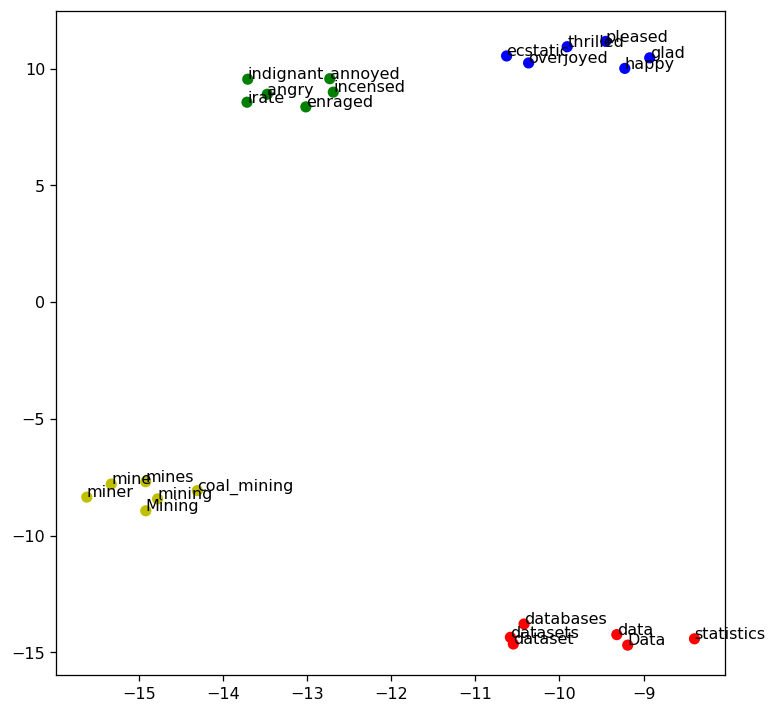

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

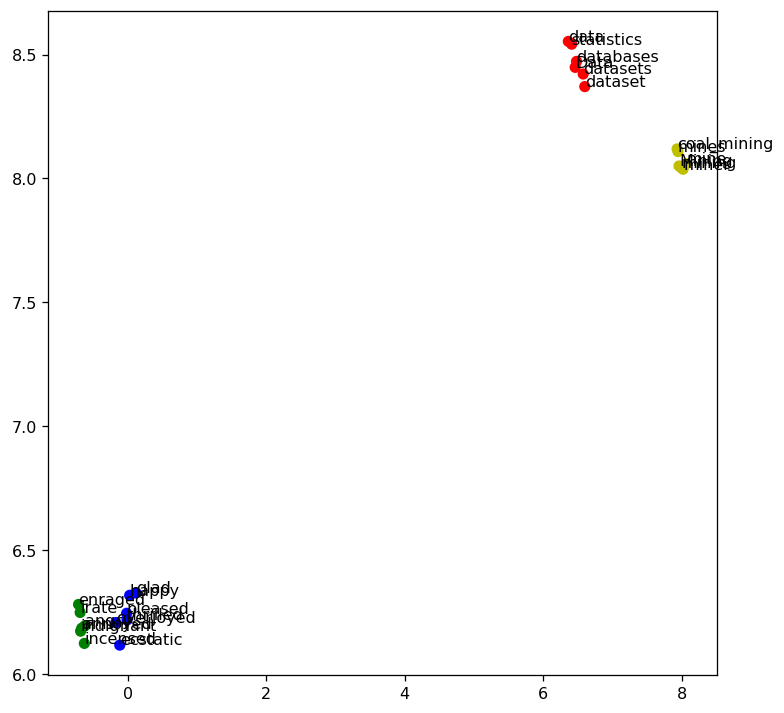

In [73]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

TARGET WORDS FOR VISUALIZATION (60 words total)
Angry words (16): ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']

Happy words (16): ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']

Sad words (16): ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']

Fear words (16): ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

Total words: 64

PREPARING WORD VECTORS
Valid target words: 64
Vector shape: (64, 300)

GENERATING

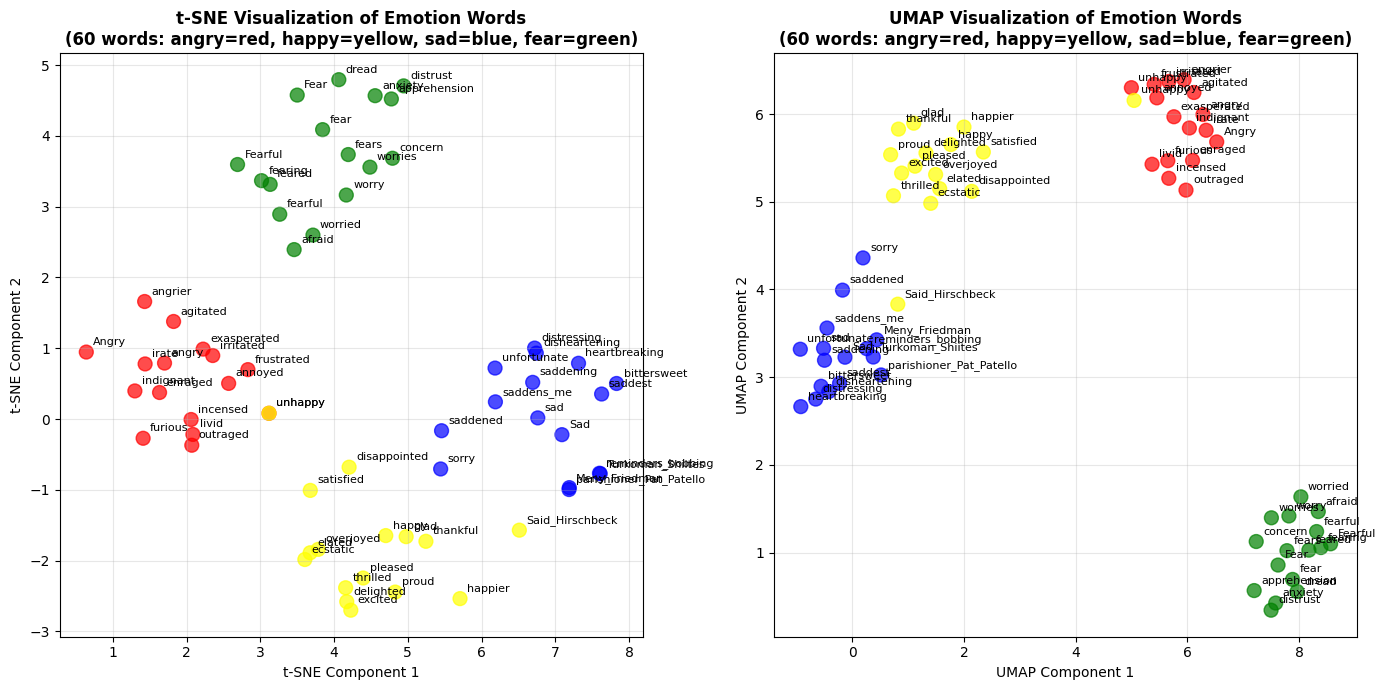


COMPARISON: t-SNE vs UMAP

KEY DIFFERENCES BETWEEN t-SNE AND UMAP:

1. CLUSTER STRUCTURE:
   t-SNE:
   - Often creates more separated, distinct clusters
   - Emphasizes local neighborhood structure
   - May create artificial gaps between clusters
   - Can sometimes show "crowding problem" where similar points are pushed apart

   UMAP:
   - Tends to preserve more of the global structure
   - Better at maintaining relative distances between clusters
   - Creates smoother, more continuous representations
   - Generally shows tighter, more cohesive clusters

2. INTERPRETATION:
   t-SNE:
   - Distances between distant clusters are not meaningful
   - Best for exploring local neighborhoods and finding clusters
   - Good for visualization but not for feature extraction

   UMAP:
   - Preserves both local and global structure better
   - Distances are more meaningful across the entire plot
   - Can be used for both visualization and feature extraction
   - Generally more faithful to original

In [74]:
# Answer here

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap
import numpy as np

# ============================================================================
# Prepare Words for Visualization
# ============================================================================
# Get 15 most related words for each emotion: angry, happy, sad, fear (60 words total)

emotion_words = ['angry', 'happy', 'sad', 'fear']
topn = 15  # 15 related words + 1 base word = 16 words per emotion

# Collect words for each emotion
angry_words = ['angry'] + [word for word, sim in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word for word, sim in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word for word, sim in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word for word, sim in w2v_google_model.most_similar('fear', topn=topn)]

# Combine all target words
target_words = angry_words + happy_words + sad_words + fear_words

print("="*70)
print("TARGET WORDS FOR VISUALIZATION (60 words total)")
print("="*70)
print(f"Angry words ({len(angry_words)}): {angry_words}")
print(f"\nHappy words ({len(happy_words)}): {happy_words}")
print(f"\nSad words ({len(sad_words)}): {sad_words}")
print(f"\nFear words ({len(fear_words)}): {fear_words}")
print(f"\nTotal words: {len(target_words)}")

# Prepare color list for visualization
# Different colors for each emotion
cn = topn + 1  # 16 words per emotion
colors = ['red'] * cn + ['yellow'] * cn + ['blue'] * cn + ['green'] * cn

# ============================================================================
# Prepare Word Vectors for Visualization
# ============================================================================

print("\n" + "="*70)
print("PREPARING WORD VECTORS")
print("="*70)

model = w2v_google_model

# Get word vectors for target words (filter out any words not in vocabulary)
target_vectors = []
valid_target_words = []
valid_colors = []

for word, color in zip(target_words, colors):
    if word in model:
        target_vectors.append(model[word])
        valid_target_words.append(word)
        valid_colors.append(color)
    else:
        print(f"Warning: '{word}' not found in model vocabulary, skipping...")

target_vectors = np.array(target_vectors)
print(f"Valid target words: {len(valid_target_words)}")
print(f"Vector shape: {target_vectors.shape}")

# ============================================================================
# t-SNE Visualization
# ============================================================================

print("\n" + "="*70)
print("GENERATING t-SNE VISUALIZATION")
print("="*70)

tsne = TSNE(n_components=2, metric='cosine', random_state=28, perplexity=min(30, len(valid_target_words)-1))
X_tsne = tsne.fit_transform(target_vectors)

# Plot t-SNE
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=valid_colors, s=100, alpha=0.7)
for i, label in enumerate(valid_target_words):
    plt.annotate(label, xy=(X_tsne[i, 0], X_tsne[i, 1]), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)
plt.title('t-SNE Visualization of Emotion Words\n(60 words: angry=red, happy=yellow, sad=blue, fear=green)', 
         fontsize=12, fontweight='bold')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True, alpha=0.3)

# ============================================================================
# UMAP Visualization
# ============================================================================

print("\n" + "="*70)
print("GENERATING UMAP VISUALIZATION")
print("="*70)

umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28, n_neighbors=min(15, len(valid_target_words)-1))
X_umap = umap_model.fit_transform(target_vectors)

# Plot UMAP
plt.subplot(1, 2, 2)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=valid_colors, s=100, alpha=0.7)
for i, label in enumerate(valid_target_words):
    plt.annotate(label, xy=(X_umap[i, 0], X_umap[i, 1]), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)
plt.title('UMAP Visualization of Emotion Words\n(60 words: angry=red, happy=yellow, sad=blue, fear=green)', 
         fontsize=12, fontweight='bold')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# Comparison Analysis
# ============================================================================

print("\n" + "="*70)
print("COMPARISON: t-SNE vs UMAP")
print("="*70)

print("""
KEY DIFFERENCES BETWEEN t-SNE AND UMAP:

1. CLUSTER STRUCTURE:
   t-SNE:
   - Often creates more separated, distinct clusters
   - Emphasizes local neighborhood structure
   - May create artificial gaps between clusters
   - Can sometimes show "crowding problem" where similar points are pushed apart
   
   UMAP:
   - Tends to preserve more of the global structure
   - Better at maintaining relative distances between clusters
   - Creates smoother, more continuous representations
   - Generally shows tighter, more cohesive clusters

2. INTERPRETATION:
   t-SNE:
   - Distances between distant clusters are not meaningful
   - Best for exploring local neighborhoods and finding clusters
   - Good for visualization but not for feature extraction
   
   UMAP:
   - Preserves both local and global structure better
   - Distances are more meaningful across the entire plot
   - Can be used for both visualization and feature extraction
   - Generally more faithful to original data structure

3. EMOTION GROUPING:
   For emotion words, we might observe:
   - t-SNE: More dramatic separation between emotion categories
           (angry vs happy vs sad vs fear might be more separated)
   - UMAP: More nuanced relationships, potentially showing:
           * Positive emotions (happy) closer together
           * Negative emotions (angry, sad, fear) might form related clusters
           * More subtle semantic relationships preserved

4. COMPUTATIONAL CONSIDERATIONS:
   t-SNE:
   - Slower on large datasets
   - Perplexity parameter needs tuning
   - Results can vary significantly with different perplexity values
   
   UMAP:
   - Generally faster
   - More stable across different parameter settings
   - Better scalability to larger datasets

5. PRACTICAL IMPLICATIONS:
   t-SNE: Better when you want to clearly identify and separate clusters
   UMAP: Better when you want to understand both local and global relationships
""")

# Calculate cluster separation metrics (simple version)
def calculate_cluster_separation(embeddings, labels):
    """Calculate average within-cluster distance vs between-cluster distance"""
    from scipy.spatial.distance import cdist
    
    unique_labels = list(set(labels))
    within_distances = []
    between_distances = []
    
    for label in unique_labels:
        cluster_points = embeddings[[i for i, l in enumerate(labels) if l == label]]
        
        # Within-cluster distances
        if len(cluster_points) > 1:
            within_dists = cdist(cluster_points, cluster_points, metric='euclidean')
            within_distances.extend(within_dists[within_dists > 0].flatten())
    
    # Between-cluster distances
    for i, label1 in enumerate(unique_labels):
        for label2 in unique_labels[i+1:]:
            cluster1_points = embeddings[[i for i, l in enumerate(labels) if l == label1]]
            cluster2_points = embeddings[[i for i, l in enumerate(labels) if l == label2]]
            between_dists = cdist(cluster1_points, cluster2_points, metric='euclidean')
            between_distances.extend(between_dists.flatten())
    
    avg_within = np.mean(within_distances) if within_distances else 0
    avg_between = np.mean(between_distances) if between_distances else 0
    separation_ratio = avg_between / avg_within if avg_within > 0 else 0
    
    return avg_within, avg_between, separation_ratio

# Create labels for emotion groups
emotion_labels = []
for i, word in enumerate(valid_target_words):
    if word in angry_words:
        emotion_labels.append('angry')
    elif word in happy_words:
        emotion_labels.append('happy')
    elif word in sad_words:
        emotion_labels.append('sad')
    elif word in fear_words:
        emotion_labels.append('fear')
    else:
        emotion_labels.append('unknown')

# Calculate metrics for both methods
tsne_within, tsne_between, tsne_ratio = calculate_cluster_separation(X_tsne, emotion_labels)
umap_within, umap_between, umap_ratio = calculate_cluster_separation(X_umap, emotion_labels)

print("\n" + "="*70)
print("QUANTITATIVE COMPARISON")
print("="*70)
print(f"t-SNE:")
print(f"  Average within-cluster distance: {tsne_within:.4f}")
print(f"  Average between-cluster distance: {tsne_between:.4f}")
print(f"  Separation ratio (between/within): {tsne_ratio:.4f}")
print(f"\nUMAP:")
print(f"  Average within-cluster distance: {umap_within:.4f}")
print(f"  Average between-cluster distance: {umap_between:.4f}")
print(f"  Separation ratio (between/within): {umap_ratio:.4f}")

if tsne_ratio > umap_ratio:
    print("\n→ t-SNE shows better cluster separation (higher separation ratio)")
else:
    print("\n→ UMAP shows better cluster separation (higher separation ratio)")

print("\n" + "="*70)
print("VISUAL OBSERVATIONS")
print("="*70)
print("""
When examining the plots, look for:

1. CLUSTER COHESION:
   - Do words from the same emotion group cluster together?
   - Which method shows tighter clusters?

2. EMOTION RELATIONSHIPS:
   - Are similar emotions (e.g., sad and fear as negative emotions) closer?
   - Are opposite emotions (e.g., happy and sad) far apart?

3. OUTLIERS:
   - Are there words that don't cluster with their emotion group?
   - This might indicate words that are semantically ambiguous

4. OVERALL LAYOUT:
   - Which visualization is easier to interpret?
   - Which preserves more of the semantic relationships?
""")

print("\nVisualization complete!")


---